Challenge 1
---
The given dataset contains average masses for women as a function 
of their height in a sample of American women of age 30–39.
Create a simple linear regression model outlining its accuracy.
---
Dataset url = http://bit.ly/HeightsandWeightsDataset
---
 
OUR CODE GOES HERE

In [117]:
import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt

import seaborn as sns 

%matplotlib inline 

In [118]:
df =pd.read_csv('../HeightsandWeightsDataset.csv')

In [119]:

df.head()


,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [120]:
df.describe()

,Height,Weight
count,15.000000,15.000000
mean,1.650667,62.078000
std,0.114235,7.037515
min,1.470000,52.210000
25%,1.560000,56.520000
50%,1.650000,61.290000
75%,1.740000,67.190000
max,1.830000,74.460000


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  15 non-null     float64
 1   Weight  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


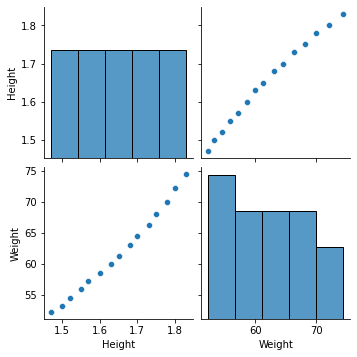

In [122]:
sns.pairplot(df)

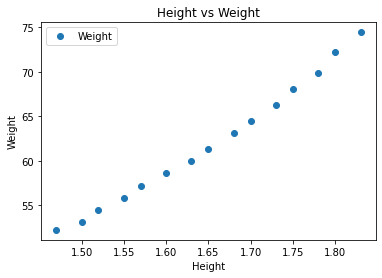

In [134]:
# Plotting to find any relationship between the variables
# 
df.plot(x='Height', y='Weight', style='o')
plt.title('Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

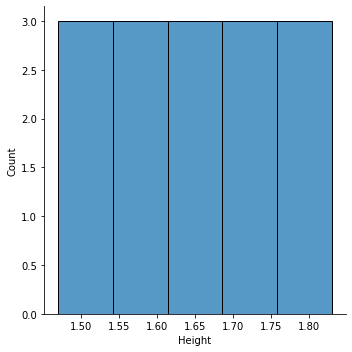

In [123]:
sns.displot(df['Height'])

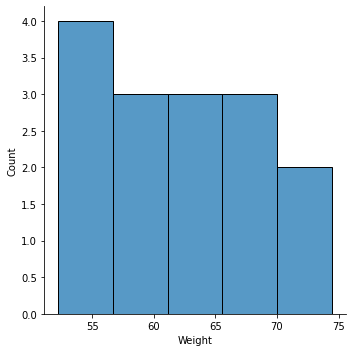

In [124]:
sns.displot(df['Weight'])

In [125]:


from sklearn.model_selection import train_test_split

X=df['Height'].values.reshape(-1,1)
y=df['Weight'].values.reshape(-1,1)


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [127]:
from sklearn.linear_model import  LinearRegression


regressor=LinearRegression()

In [128]:
regressor.fit(X_train, y_train)

LinearRegression()

In [129]:
print(regressor.intercept_)
print(regressor.coef_)

[-39.25676962]
[[61.45820729]]


In [130]:
y_pred=regressor.predict(X_test)

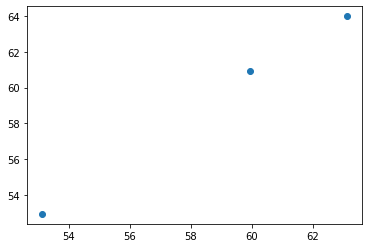

In [135]:
plt.scatter(y_test, y_pred)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


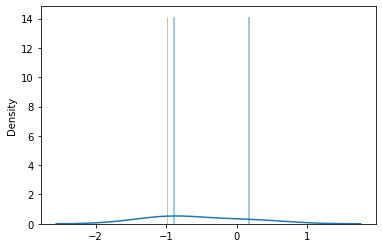

In [136]:
sns.distplot((y_test-y_pred),bins=50);

In [131]:


data ={'Actual': y_test, 'Predicted': y_pred}

print(data)

{'Actual': array([[53.12],
       [59.93],
       [63.11]]), 'Predicted': array([[52.93054132],
       [60.92010826],
       [63.99301863]])}


In [132]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# From the output, we will see that the value of root mean squared error is 4.64, 
# which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. 
# This means that our algorithm did a decent job.

Mean Absolute Error: 0.6875285251817592
Mean Squared Error: 0.5986436208283817
Root Mean Squared Error: 0.773720634873067
